This Jupyter Notebook will contain a compilation of the Matlab code that I wrote as part of my Numerical Physics class of my senior year of Electrical Engineering degree. I'm choosing to re-write them in Python mainly for practice, but to also compile the work I've done in my degree.

function to compute acceleration given velocity

In [5]:
#from Matlab - function accel = accel(v,Cd,rho,A,m,g,Dm,w)

import numpy as np

def acceleration(v, Cd, rho, A, m, g, Dm, w):
    velocity = np.array([v[0], v[1], v[2]])
    vmag = np.linalg.norm(velocity)

    magnus = m * Dm * np.cross(w, v)

    force = np.array([-0.5 * Cd * rho * A * vmag * v[0] + magnus[0],
    -0.5 * Cd * rho * A * vmag * v[1] + magnus[1],
    -0.5 * Cd * rho * A * vmag * v[2] - m * g + magnus[2]])

    acceleration = force/m

    return acceleration

v = [10, 5, 2]  #velocity vector
Cd = 0.47       #drag coeff.
rho = 1.225     #air density in kg/m^3
A = 0.05        #cross-sectional area in m^2
m = 0.15        #mass in kg
g = 9.81        #acceleration due to gravity in m/s^2
Dm = 0.1        #Magnus effect coeff.
w = [0, 0, 10]  #angular velocity vector

result = acceleration(v, Cd, rho, A, m, g, Dm, w)
print(result)

#Note: the results will print a matrix showing the acceleration vector a_x, a_y, a_z basef off of the parameters we feed it.
#in the a_x and a_y directions, the acceleration is affected by drag and Magnus force, while a_z is affected by these 2 factors and gravitational force.

[-15.8987716    4.5506142  -11.98975432]


Euler Code, "ye" being regular Euler and "yea" being improved Euler

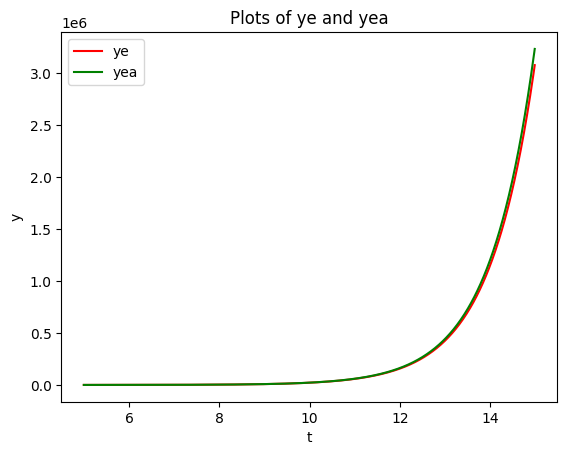

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.01
a = 5
b = 15
t0 = a
y0 = np.exp(t0) - t0 - 1

# Number of steps
n = int((b - a) / h)

# Initialize arrays
t = np.zeros(n)
yth = np.zeros(n)
ye = np.zeros(n)
yea = np.zeros(n)

# Initial conditions
t[0] = t0
yth[0] = y0
ye[0] = y0
yea[0] = y0

# Iterative calculation
for i in range(1, n):
    t[i] = t[i - 1] + h
    yth[i] = np.exp(t[i]) - t[i] - 1
    ye[i] = ye[i - 1] * (1 + h) + t[i - 1] * h
    yea[i] = yea[i - 1] * 0.5 * (2 + 2 * h + h * h) + 0.5 * t[i - 1] * h * (2 + h) + 0.5 * h * h

# Plotting
plt.plot(t, ye, 'r', label='ye')
plt.plot(t, yea, 'g', label='yea')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Plots of ye and yea')
plt.show()